In [51]:
# Iportando librerias

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os

## **1. Cargando el dataframe**

In [52]:
os.getcwd() # Obtener la carpeta como de raiz

df = pd.read_excel('data/Retail_Invoices.xlsx')

df.head()

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
0,536365,2010-12-01,17850,40,139.12,7
1,536366,2010-12-01,17850,12,22.20,2
2,536367,2010-12-01,13047,83,278.73,12
3,536368,2010-12-01,13047,15,70.05,4
4,536369,2010-12-01,13047,3,17.85,1


In [53]:
print(f'El dataframe tiene un total de {df.shape[0]} filas y {df.shape[1]} columnas')

El dataframe tiene un total de 22190 filas y 6 columnas


## **2. EDA**

### **2.1 Revisión columnas**

In [54]:
# Identificando los tipos de datos y viendo si hay nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  object        
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 1.0+ MB


### **Insight**:

- No hay datos nulos.
- InvoiceNo es obj cuando deberia ser numérico.
- Tenemos la mayoría de datos numéricos

In [55]:
# Convirtiendo a numérico InvoiceNo

try:
    
    df['InvoiceNo'] = pd.to_numeric(df['InvoiceNo'])

except:
    
    df['InvoiceNo'] = df['InvoiceNo'].astype(str).str.replace(r'[a-zA-Z]+', '', regex=True).astype('int')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22190 entries, 0 to 22189
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    22190 non-null  int64         
 1   InvoiceDate  22190 non-null  datetime64[ns]
 2   CustomerID   22190 non-null  int64         
 3   Quantity     22190 non-null  int64         
 4   price_total  22190 non-null  float64       
 5   StockCode    22190 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 1.0 MB


### **2.2 Duplicados**

In [57]:
total_duplicados = df.duplicated().sum()

print(f'El total de duplicados es de {total_duplicados}')

El total de duplicados es de 0


In [58]:
numeric_cols = df.drop(columns='InvoiceDate', axis=1).columns.to_list()
numeric_cols

['InvoiceNo', 'CustomerID', 'Quantity', 'price_total', 'StockCode']

## **3. ESTADÍSTICAS PRINCIPALES**

In [59]:
df[numeric_cols[1:]].describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,22190.0,15238.498738,1733.149624,12346.0,13755.0000,15136.000,16746.0000,18287.0
Quantity,22190.0,221.130599,1170.215301,-80995.0,30.0000,120.000,254.0000,80995.0
price_total,22190.0,374.045327,2018.482869,-168469.6,87.9625,241.505,418.0225,168469.6
StockCode,22190.0,18.333889,23.892111,1.0,3.0000,12.000,24.0000,542.0


**Insights**:

1.  Lo primero que salta a la vista es los valores negativos tanto de Quantity y price_total los que no tienen sentido en el contexto de nuestro problema

2.  Igual puede ser que los valores maximos esten muy altos... pero primero tendremos que sacar los negativos para evitar la influencia de estos en la media.

3.  Hay un usuario que se llevo 542 objetos distintos lo que parece bastante extraño

In [60]:
for col in numeric_cols:
    print(f'\n Para la columna {col} existen {len(df[col].unique())} registros distintos')
    print(f'=='*30)




 Para la columna InvoiceNo existen 22190 registros distintos

 Para la columna CustomerID existen 4372 registros distintos

 Para la columna Quantity existen 1594 registros distintos

 Para la columna price_total existen 16534 registros distintos

 Para la columna StockCode existen 199 registros distintos


### **3.1. price_total y**

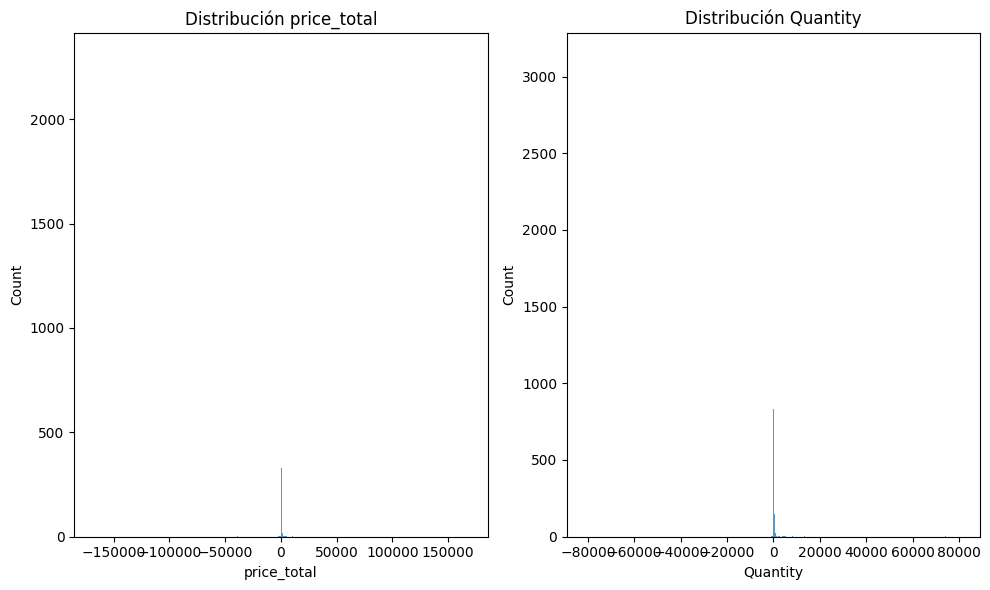

In [61]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.histplot(df['price_total'])
plt.title('Distribución price_total')

# Gráfico 2
plt.subplot(122) 
sns.histplot(df['Quantity'])
plt.title('Distribución Quantity')

plt.tight_layout()
plt.show()

Es claro que existen dratos que son demasiado alejados de la tendencia real de estos por eso nuestros gráficos se ven de esa manera.

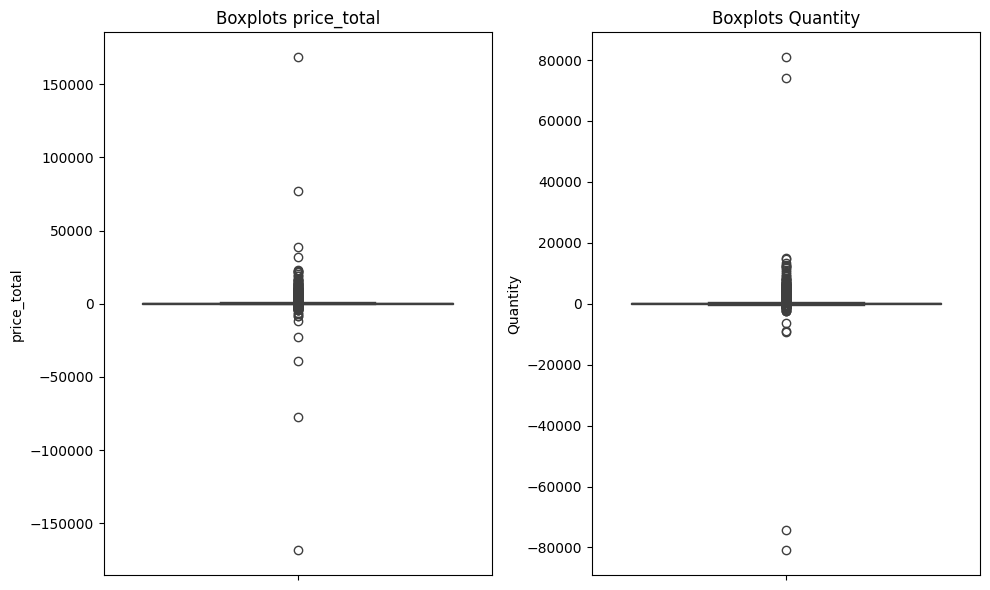

In [62]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.boxplot(df['price_total'])
plt.title('Boxplots price_total')

# Gráfico 2
plt.subplot(122) 
sns.boxplot(df['Quantity'])
plt.title('Boxplots Quantity')

plt.tight_layout()
plt.show()

En los boxplots también se observa lo mismo, existen outliers tanto positivos como negativos

In [63]:
def outliers_index(df, col):

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - (1.5*IQR)
    upper_bound = Q3 + (1.5*IQR)


    indices_atipicos = df[col].index[(df[col] < lower_bound) | (df[col] > upper_bound)].tolist()
    return indices_atipicos

In [64]:
outliers_index_pricetotal = outliers_index(df, 'price_total')

df.iloc[outliers_index_pricetotal, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
20,536387,2010-12-01,16029,1440,3193.92,5
23,536390,2010-12-01,17511,1568,1825.74,24
26,536394,2010-12-01,13408,544,1024.68,11
54,536477,2010-12-01,16210,1070,2474.74,14
71,536531,2010-12-01,15485,416,950.09,23
...,...,...,...,...,...,...
22000,579195,2011-11-28,14096,-1,-987.14,1
22120,580726,2011-12-05,14096,-1,-1100.44,1
22145,580954,2011-12-06,12967,-194,-436.20,13
22150,580971,2011-12-06,14298,-322,-664.86,3


In [65]:
outliers_index_quantity = outliers_index(df, 'Quantity')

df.iloc[outliers_index_quantity, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
20,536387,2010-12-01,16029,1440,3193.92,5
23,536390,2010-12-01,17511,1568,1825.74,24
48,536437,2010-12-01,13694,1004,842.12,6
54,536477,2010-12-01,16210,1070,2474.74,14
72,536532,2010-12-01,12433,1852,1919.14,73
...,...,...,...,...,...,...
21976,578363,2011-11-24,15482,-948,-2210.64,12
21980,578377,2011-11-24,14277,-360,-259.20,3
21999,579192,2011-11-28,12657,-390,-491.12,9
22150,580971,2011-12-06,14298,-322,-664.86,3


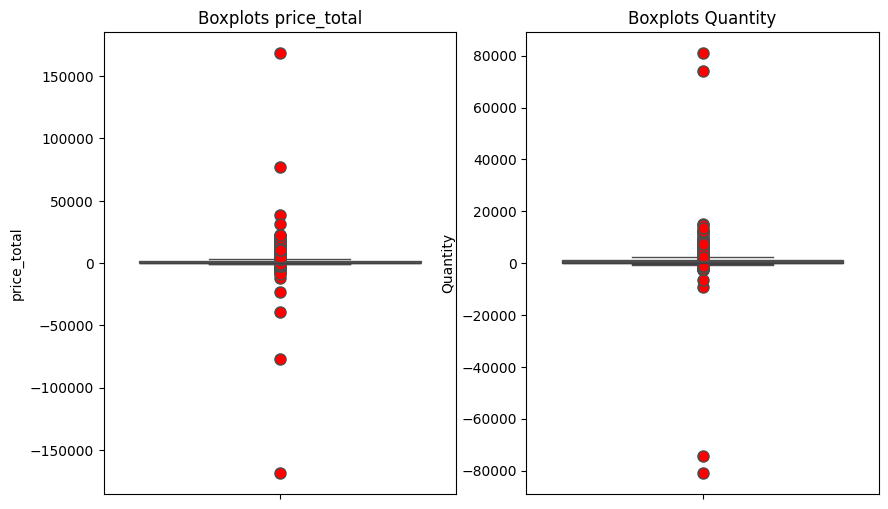

In [66]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['price_total'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['Quantity'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots Quantity')
plt.show()

Vamos a revisar que pasa si convertimos los valores negativos en positivos

In [67]:
df['Quantity'] = df['Quantity'].apply(lambda x: x*(-1) if x < 0 else x)

df['price_total'] = df['price_total'].apply(lambda x: x*(-1) if x < 0 else x)

In [68]:
df['Quantity'].min()

np.int64(1)

In [69]:
outliers_index_pricetotal = outliers_index(df, 'price_total')
outliers_index_quantity = outliers_index(df, 'Quantity')


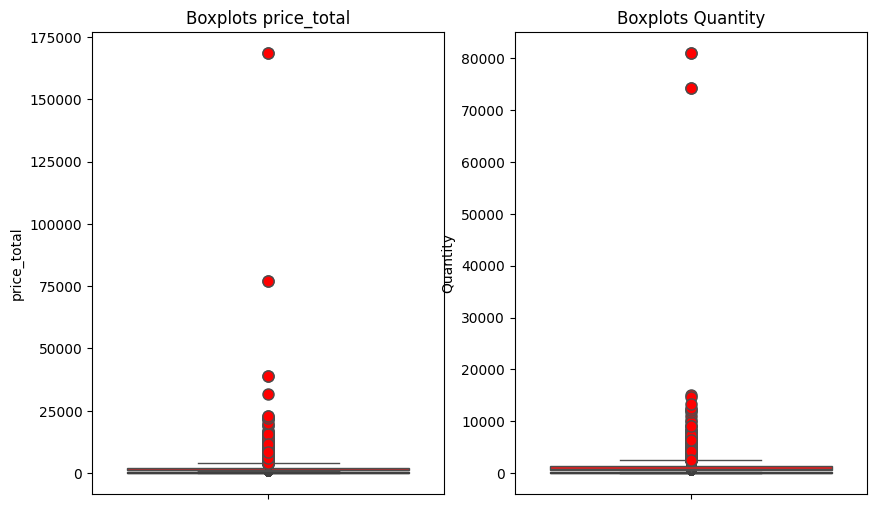

In [70]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['price_total'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
sns.boxplot(df.iloc[outliers_index_pricetotal, :]['Quantity'], color='r', flierprops = dict(marker='o',            # Tipo de marcador
                  markerfacecolor='red', # Color de relleno del marcador
                  markersize=8,          # Tamaño del marcador
                  linestyle='none')
                              # Sin línea conectando los outliers,palette='Set2'
)
plt.title('Boxplots Quantity')
plt.show()

In [71]:
print(f'El total de registros antes de la eliminacion son: {df.shape[0]}')

El total de registros antes de la eliminacion son: 22190


In [72]:
df.drop(index=outliers_index_pricetotal+outliers_index_quantity, inplace=True)


In [73]:
df[['Quantity', 'price_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20163.0,139.393394,130.365181,1.0,29.000,106.0,211.000,586.0
price_total,20163.0,250.376144,203.358977,0.0,84.495,214.8,360.595,909.6


- La cantidad es normal que sea 1.
- Lo anormal que hay precios totales que son igual a 0

In [74]:
# Revisando los registros donde price_total es 0. 
df.loc[df['price_total']==0, :]

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
2721,543599,2011-02-10,17560,16,0.0,1
11301,564651,2011-08-26,14646,576,0.0,4
12848,568384,2011-09-27,12748,1,0.0,1


In [75]:
df = df.loc[df['price_total']!=0, :]

In [76]:
df[['Quantity', 'price_total']].describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,20160.0,139.384722,130.332068,1.00,29.00,106.0,211.000,586.0
price_total,20160.0,250.413402,203.351168,0.38,84.68,214.8,360.655,909.6


In [77]:
df.sort_values(by='price_total',ascending=True).head(20)

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode
13792,570554,2011-10-11,14800,1,0.38,1
20636,561016,2011-07-22,14056,1,0.39,1
21397,570331,2011-10-10,14606,1,0.39,1
12594,567869,2011-09-22,16669,5,0.40,1
19196,543780,2011-02-11,17334,1,0.42,1
19376,545847,2011-03-07,15903,1,0.42,1
20533,559830,2011-07-13,16998,1,0.48,1
21601,573172,2011-10-28,16966,1,0.50,1
2379,542736,2011-01-31,14744,1,0.55,1
20157,555354,2011-06-02,16566,1,0.65,1


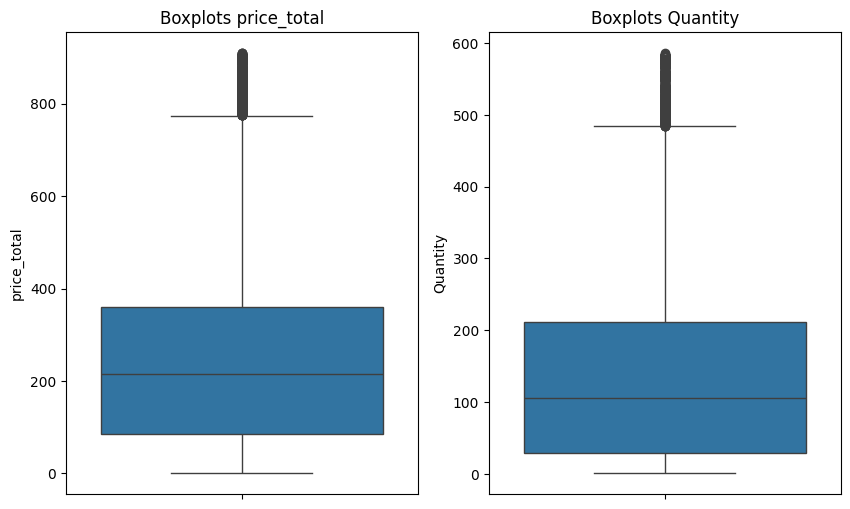

In [78]:
# Gráfico 1
plt.figure(figsize=(10, 6))
plt.subplot(121)
sns.boxplot(df['price_total'])

plt.title('Boxplots price_total')


plt.subplot(122)
sns.boxplot(df['Quantity'])
plt.title('Boxplots Quantity')
plt.show()

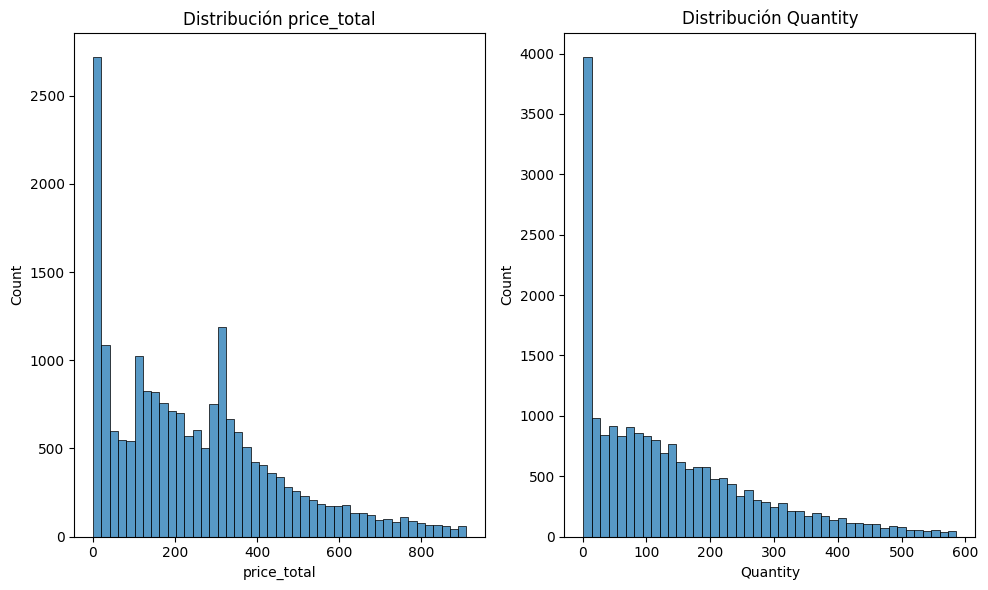

In [79]:
plt.figure(figsize=(10, 6))

# Gráfico 1
plt.subplot(121) 
sns.histplot(df['price_total'])
plt.title('Distribución price_total')

# Gráfico 2
plt.subplot(122) 
sns.histplot(df['Quantity'])
plt.title('Distribución Quantity')

plt.tight_layout()
plt.show()

- Las distribuciones de los datos se encuentran en los parámetros esperados para nuestro contexto. Se favorecen lo totales mas bajos y las cantidades mas bajo también

In [80]:

df['Quantity_log'] = np.log(df['Quantity'])
df['price_total_log'] = np.log(df['price_total'])

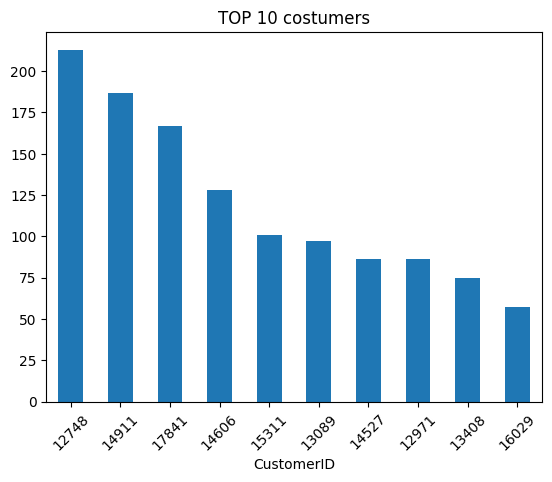

In [81]:
df.groupby('CustomerID')[['InvoiceNo']].size().sort_values(ascending=False)[:10].plot(kind='bar')
plt.title('TOP 10 costumers')
plt.xticks(rotation=45)
plt.show()

In [82]:
df_ = df.copy()

In [83]:
df_.set_index('InvoiceDate',inplace=True)

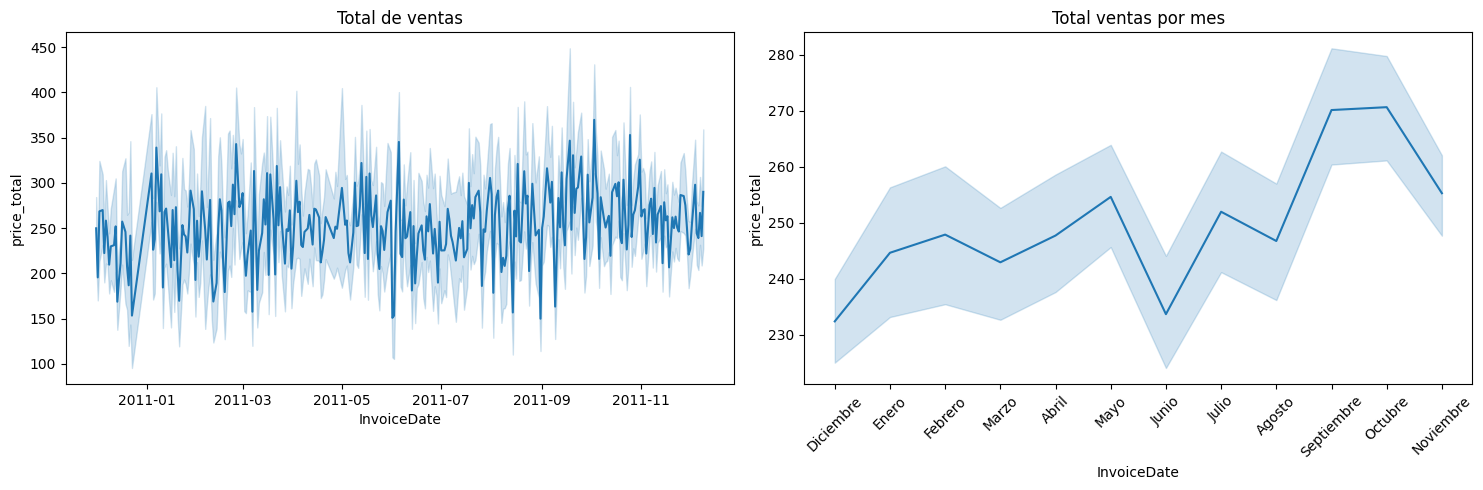

In [84]:
plt.figure(figsize=(15, 5))

plt.subplot(121)
sns.lineplot(data=df_, x=df_.index, y='price_total')
plt.title('Total de ventas')

plt.subplot(122)
sns.lineplot(data=df_, x=df_.index.month_name(locale='es_CL.utf8'), y='price_total')
plt.title('Total ventas por mes')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


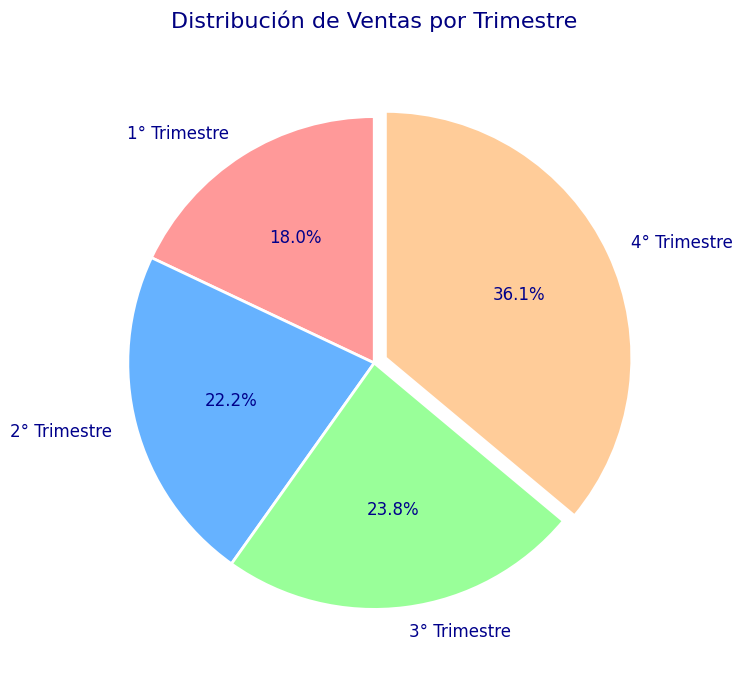

In [85]:
labels_esp = ['1° Trimestre', '2° Trimestre', '3° Trimestre', '4° Trimestre']


# Definir colores atractivos para cada trimestre
colores = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99']

# Crear el gráfico de pastel con mejoras visuales
plt.figure(figsize=(8, 8))  # Tamaño del gráfico
plt.pie(
    df_.groupby(df_.index.quarter)['price_total'].sum(), 
    labels=labels_esp, 
    autopct='%1.1f%%',  # Mostrar porcentaje en cada sector
    startangle=90,      # Ángulo inicial para mejorar la visualización
    colors=colores,     # Colores personalizados
    wedgeprops={'edgecolor': 'white', 'linewidth': 2},  # Borde blanco para los sectores
    textprops={'fontsize': 12, 'color': 'darkblue'},    # Estilo de las etiquetas
    explode=(0, 0, 0, 0.05)  # Resaltar el primer trimestre
)

# Agregar un título llamativo
plt.title('Distribución de Ventas por Trimestre', fontsize=16, color='navy', pad=20)

# Mostrar el gráfico
plt.show()

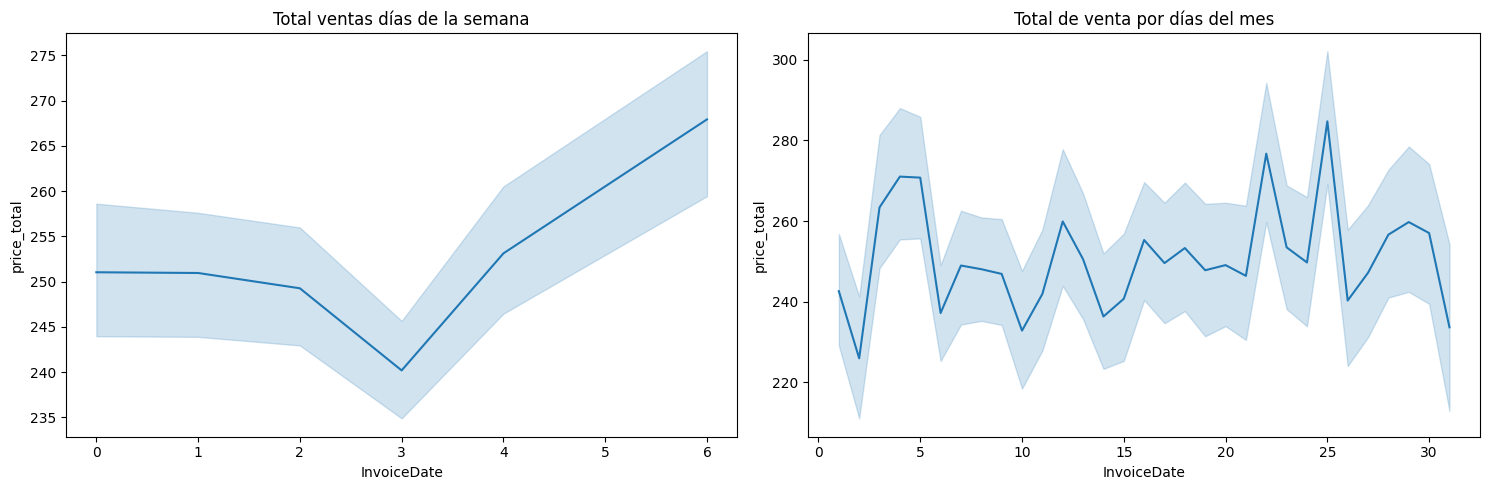

In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(121)

sns.lineplot(data=df_, x=df_.index.weekday, y='price_total')
plt.title('Total ventas días de la semana')

plt.subplot(122)

sns.lineplot(data=df_, x=df_.index.day, y='price_total')
plt.title('Total de venta por días del mes')

plt.tight_layout()
plt.show()

# **Insights**

### **Tendencia general de ventas**
- Las ventas a lo largo del año no tienen una tendencia clara, manteniéndose más bien relativamente estacionarias. Sin embargo, hay ciertas fluctuaciones que merecen atención.

### **Análisis Trimestral**
- **Mejor trimestre:** El trimestre con mayor volumen de ventas corresponde al 4°.
- **Trimestres estacionarios:** Los trimestres que concentran la mayoría de las ventas en conjunto representan casi el 50% de las ventas.
- **Peor trimestre:** Se corresponde con el primer trimestre del año.

### **Análisis Mensual**
- **Mejores meses:** Septiembre - Octubre.
- **Peores meses:** Junio - Diciembre.
- **Ciclos de venta:**
  - Desde junio, donde se alcanza el mínimo de ventas, se observa un crecimiento sostenido de las ventas hasta septiembre y octubre, donde alcanzan su máximo.
  - Posteriormente, las ventas disminuyen gradualmente hasta que alcanzan su segundo mínimo del año.
  - Ya en este punto, se aprecia un aumento sostenido, menor al anteriormente mencionado, que culmina en el antes nombrado peor mes del año.

---

## **CONCLUSIONES**

### **Estrategias comerciales**
- Se podría analizar generar estrategias de ventas más agresivas para los meses de junio y diciembre.

### **Días de la semana**
- Analizar una reducción de recursos para el día miércoles puede ser una opción por la notable diferencia entre estos días con los demás.

### **Fines de semana y finales y comienzos del mes**
- Estar preparados con mayor stock para el último trimestre parece ser necesario. Además, durante el año, estar siempre atentos a los fines de semana.


## RFM

In [87]:
outliers_index_pricetotal = outliers_index(df, 'price_total')
outliers_index_quantity = outliers_index(df, 'Quantity')

df.drop(outliers_index_pricetotal + outliers_index_quantity, inplace=True)

In [88]:
# Primero agrupamos por el customerid ya que un mismo customer puede tener mas de 1 pedido. Después aplicamos el maximo para el invoiceDate para conocer la fecha de la ultima compra
fecha_maxima = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
fecha_maxima.columns = ['CustomerID', 'FechaReciente']

# Fusiona el DataFrame original con las fechas máximas
df_filtrado = pd.merge(df, fecha_maxima, on='CustomerID', how='left')

# Calcula la recencia para cada transacción
df_filtrado['Recencia'] = (df_filtrado['FechaReciente'] - df_filtrado['InvoiceDate']).dt.days
df_filtrado.drop(columns='FechaReciente', inplace=True)



In [89]:
#Frecuencia (F) para esto agrupamos por customer id y calculamos sobre InvoiceNo aplicando nunique para saber las comprar por clientes
frecuencia_cliente = df_filtrado.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frecuencia_cliente.columns = ['CustomerID', 'Frecuencia']
df_filtrado = pd.merge(df_filtrado, frecuencia_cliente, on='CustomerID', how='left')


In [90]:
#Monto (M) Agrupamos por customerId y sumamos todas las compras
monto_cliente = df_filtrado.groupby('CustomerID')['price_total'].sum().reset_index()
monto_cliente.columns = ['CustomerID', 'Monto']
df_filtrado = pd.merge(df_filtrado, monto_cliente, on='CustomerID', how='left')

Recencia (R): Se refiere al tiempo que ha pasado desde la última compra del cliente. Los clientes que han comprado más recientemente son considerados más activos y, por lo tanto, más propensos a realizar compras futuras.

Frecuencia (F): Mide la cantidad de veces que un cliente ha realizado una compra en un período determinado. Los clientes que compran con mayor frecuencia son valorados más altamente.

Monto (M): Indica el total de dinero gastado por el cliente en todas sus compras. Los clientes que gastan más dinero son considerados más valiosos para la empresa.

In [91]:
df_filtrado

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,Quantity_log,price_total_log,Recencia,Frecuencia,Monto
0,536365,2010-12-01,17850,40,139.12,7,3.688879,4.935337,71,35,5493.79
1,536366,2010-12-01,17850,12,22.20,2,2.484907,3.100092,71,35,5493.79
2,536367,2010-12-01,13047,83,278.73,12,4.418841,5.630244,342,18,3395.98
3,536368,2010-12-01,13047,15,70.05,4,2.708050,4.249209,342,18,3395.98
4,536369,2010-12-01,13047,3,17.85,1,1.098612,2.882004,342,18,3395.98
...,...,...,...,...,...,...,...,...,...,...,...
19433,581470,2011-12-08,17924,4,8.32,1,1.386294,2.118662,0,12,1456.15
19434,581490,2011-12-09,14397,23,32.53,2,3.135494,3.482163,0,23,2669.24
19435,581499,2011-12-09,15498,1,224.69,1,0.000000,5.414722,0,31,9175.29
19436,581568,2011-12-09,15311,5,54.75,1,1.609438,4.002777,0,88,23054.30


Index(['Recencia', 'Frecuencia', 'Monto'], dtype='object')


/home/kevin-llanos/projecto/venv/lib/python3.12/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


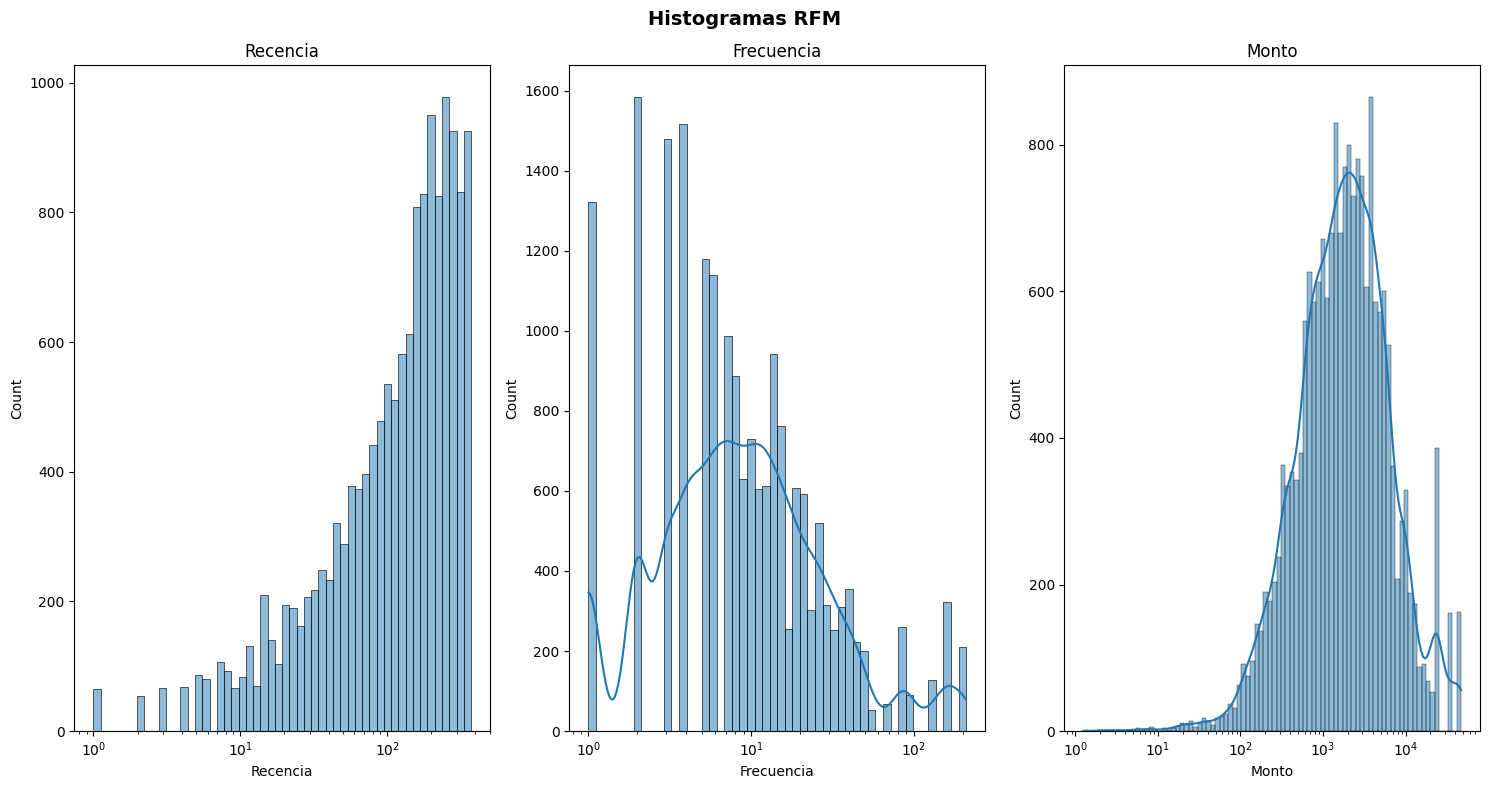

In [92]:
columnas_rfm = df_filtrado.columns[8:]
print(columnas_rfm)
fig, axes = plt.subplots(1, len(columnas_rfm), figsize=(15, 8))

for i, col in enumerate(columnas_rfm):
    sns.histplot(df_filtrado[col], ax=axes[i], kde=True, log_scale=True)
    axes[i].set_title(col)
plt.suptitle('Histogramas RFM', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()


### **Recencia**

- Según lo observado en el histograma, es claro que la mayoría de los clientes han hecho compras recientes.
 
- Tambíen podemos notar que la extensa cola hacia recencias mas altas indican que varios clientes no han comprado en muncho tiempo.

### **Frecuencia**

- Los compradores tienen tendencia a comprar de forma poco recurrente.  Existen algunos clientes con frecuencia alta quienes serian nuestros clientes más frecuentes

### **Monto**

- La mayoría de los clientes generan montos bajos aunque hay clientes con montos significativamente más altos. Esto reafirma que la regla del 80/20 generan la mayor parte de los ingresos


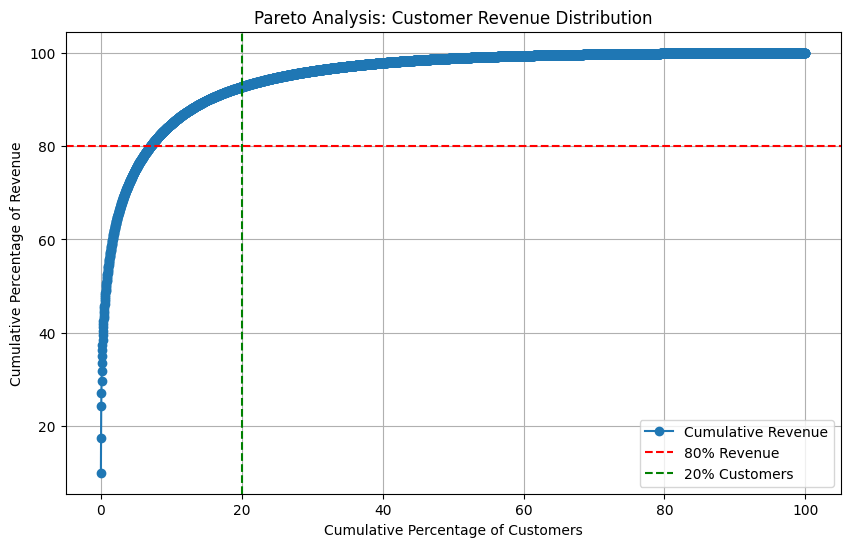

In [93]:
customer_revenue = df_filtrado.groupby("CustomerID")["Monto"].sum().reset_index()

# Ordenar los clientes por el ingreso en orden descendente
customer_revenue = customer_revenue.sort_values(by="Monto", ascending=False)

# Calcular el porcentaje acumulado de ingresos
customer_revenue["Cumulative Revenue"] = customer_revenue["Monto"].cumsum()
customer_revenue["Cumulative Percentage"] = 100 * customer_revenue["Cumulative Revenue"] / customer_revenue["Monto"].sum()

# Calcular el porcentaje acumulado de clientes
customer_revenue["Customer Percentage"] = 100 * (np.arange(1, len(customer_revenue) + 1) / len(customer_revenue))

# Crear la gráfica de Pareto
plt.figure(figsize=(10, 6))
plt.plot(customer_revenue["Customer Percentage"], customer_revenue["Cumulative Percentage"], marker="o", label="Cumulative Revenue")
plt.axhline(80, color="r", linestyle="--", label="80% Revenue")
plt.axvline(20, color="g", linestyle="--", label="20% Customers")
plt.title("Pareto Analysis: Customer Revenue Distribution")
plt.xlabel("Cumulative Percentage of Customers")
plt.ylabel("Cumulative Percentage of Revenue")
plt.legend()
plt.grid()

# Mostrar la gráfica
plt.show()

In [94]:
top_20_percent_customers = customer_revenue[customer_revenue["Cumulative Percentage"] <= 80]
top_20_percent_customers

,CustomerID,Monto,Cumulative Revenue,Cumulative Percentage,Customer Percentage
1802,14911,7612833.60,7612833.60,10.023075,0.023821
3878,17841,5652394.44,13265228.04,17.465032,0.047642
302,12748,5143956.07,18409184.11,24.237577,0.071463
527,13089,2118912.00,20528096.11,27.027342,0.095283
2090,15311,2028778.40,22556874.51,29.698437,0.119104
...,...,...,...,...,...
57,12428,36177.00,60584810.54,79.766111,6.955693
237,12664,36088.92,60620899.46,79.813626,6.979514
4035,18065,36083.70,60656983.16,79.861133,7.003335
3341,17069,35934.34,60692917.50,79.908445,7.027156


In [95]:
recency_threshold = df_filtrado["Recencia"].quantile(0.2)

# Filtrar los usuarios nuevos (aquellos con recencia menor o igual al umbral)
new_users = df_filtrado[df_filtrado["Recencia"] <= recency_threshold]


new_users

,InvoiceNo,InvoiceDate,CustomerID,Quantity,price_total,StockCode,Quantity_log,price_total_log,Recencia,Frecuencia,Monto
16,536384,2010-12-01,18074,190,489.60,13,5.247024,6.193589,0,1,489.60
22,536393,2010-12-01,13747,8,79.60,1,2.079442,4.377014,0,1,79.60
31,536403,2010-12-01,12791,97,192.60,2,4.574711,5.260615,0,1,192.60
36,536409,2010-12-01,17908,173,243.28,58,5.153292,5.494213,0,1,243.28
40,536420,2010-12-01,16583,111,233.45,14,4.709530,5.452968,0,1,233.45
...,...,...,...,...,...,...,...,...,...,...,...
19433,581470,2011-12-08,17924,4,8.32,1,1.386294,2.118662,0,12,1456.15
19434,581490,2011-12-09,14397,23,32.53,2,3.135494,3.482163,0,23,2669.24
19435,581499,2011-12-09,15498,1,224.69,1,0.000000,5.414722,0,31,9175.29
19436,581568,2011-12-09,15311,5,54.75,1,1.609438,4.002777,0,88,23054.30


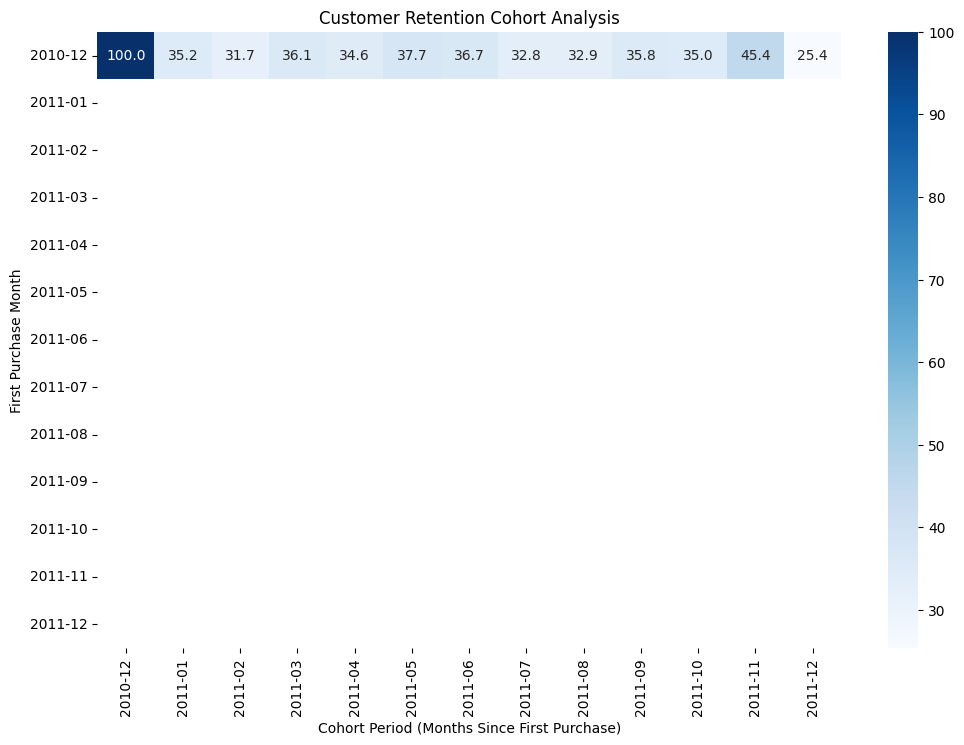

66.88899475940924

In [96]:
# Agrupar datos por cliente y calcular fechas de compra más tempranas y más recientes
customer_dates = df_filtrado.groupby("CustomerID")["InvoiceDate"].agg(["min", "max"]).reset_index()

# Calcular el tiempo de retención (en días) como la diferencia entre la última y la primera compra
customer_dates["Retention Time (days)"] = (customer_dates["max"] - customer_dates["min"]).dt.days

# Filtrar clientes con más de una compra para identificar tasas de retención
repeat_customers = customer_dates[customer_dates["Retention Time (days)"] > 0]

# Calcular la tasa de retención en porcentajes
total_customers = len(customer_dates)
retained_customers = len(repeat_customers)
retention_rate = (retained_customers / total_customers) * 100

# Crear cohortes agrupando por mes del primer `InvoiceDate`
df_filtrado["FirstPurchaseMonth"] = df_filtrado.groupby("CustomerID")["InvoiceDate"].transform("min").dt.to_period("M")
cohort_analysis = df_filtrado.groupby(["FirstPurchaseMonth", df_filtrado["InvoiceDate"].dt.to_period("M")])["CustomerID"].nunique().unstack()

# Calcular la retención como porcentaje respecto al tamaño inicial de la cohorte
cohort_size = cohort_analysis.iloc[:, 0]
retention_matrix = cohort_analysis.divide(cohort_size, axis=0) * 100

# Crear un heatmap de retención
plt.figure(figsize=(12, 8))
import seaborn as sns
sns.heatmap(retention_matrix, annot=True, fmt=".1f", cmap="Blues")
plt.title("Customer Retention Cohort Analysis")
plt.xlabel("Cohort Period (Months Since First Purchase)")
plt.ylabel("First Purchase Month")
plt.show()

retention_rate


In [100]:
df_filtrado.to_csv('data/training_data.csv')